## PANDAS

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading external data & Plotting

In [5]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [4]:
df = pd.read_csv('btc-market-price.csv')

In [8]:
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


In [11]:
df = pd.read_csv('btc-market-price.csv', header=None)

In [12]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [15]:
#Insert Columns name
df.columns = ['Timestamp','Price']

In [17]:
df.shape

(365, 2)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Price      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [14]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [20]:
#view bottom 5 rows or (n) row
df.tail()

,Timestamp,Price
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [21]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

In [22]:
# change timestamp object into datetime64, and view first 5 data
pd.to_datetime(df['Timestamp']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [23]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [24]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [25]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

In [26]:
#change the colum timestamp as index
df.set_index('Timestamp', inplace=True)

In [27]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [30]:
#easier to use .loc aftr change timestamp as index
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

### Putting Everything together

In [33]:
df = pd.read_csv('btc-market-price.csv', header=None)
df.columns = ['Timestamp','Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [34]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [5]:
df = pd.read_csv(
    'btc-market-price.csv',
    #no header
    header=None,
    #assign column name
    names=['Timestamp','Price'],
    #set first column as index
    index_col=0,
    #????
    parse_dates=True
    )

In [6]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [7]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

<Axes: xlabel='Timestamp'>

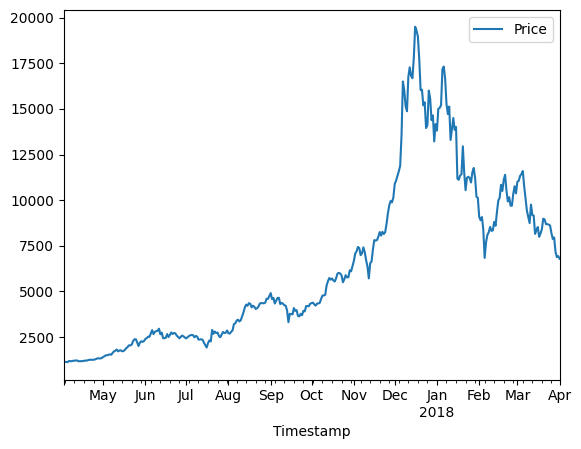

In [8]:
#plot graph using pandas command
df.plot()

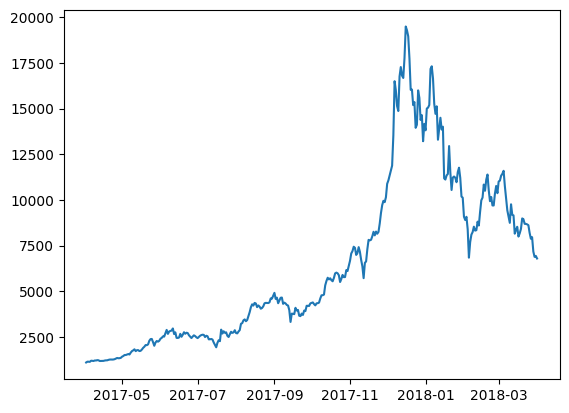

In [9]:
#Plot graph using matplotlib command
plt.plot(df.index, df['Price'])

In [13]:
x = np.arange(-10,11)

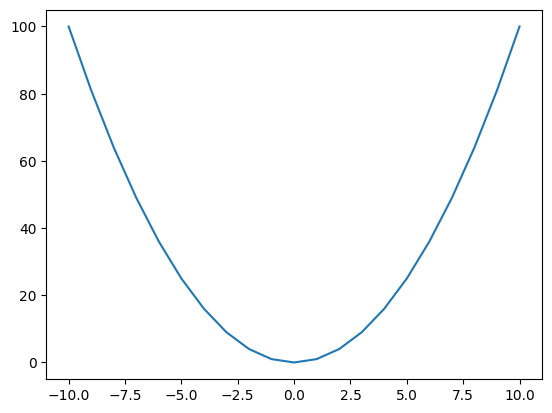

In [14]:
plt.plot(x,x**2)

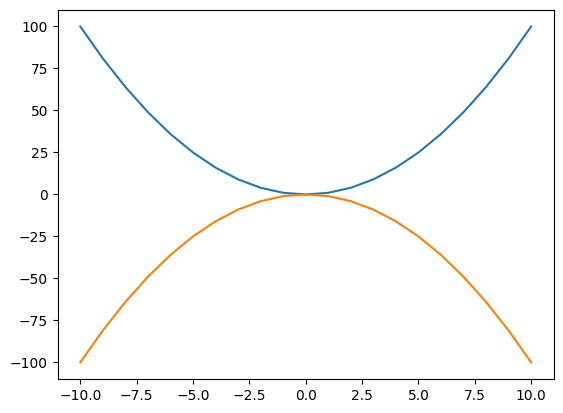

In [15]:
plt.plot(x, x**2)
plt.plot(x,-1*(x**2))

### A more challenging parsing

In [16]:
eth = pd.read_csv('eth-price.csv')

In [17]:
eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In [19]:
# Parse_date?
eth = pd.read_csv('eth-price.csv', parse_dates=True)
print(eth.dtypes)
eth.head()

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object


,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In [22]:
pd.to_datetime(eth['UnixTimeStamp']).head()

0   1970-01-01 00:00:01.491091200
1   1970-01-01 00:00:01.491177600
2   1970-01-01 00:00:01.491264000
3   1970-01-01 00:00:01.491350400
4   1970-01-01 00:00:01.491436800
Name: UnixTimeStamp, dtype: datetime64[ns]

In [23]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [24]:
pd.to_datetime(eth['Date(UTC)']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Date(UTC), dtype: datetime64[ns]

In [25]:
pd.read_csv('eth-price.csv', parse_dates=[0]).head()

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23


In [26]:
eth = pd.read_csv('eth-price.csv', parse_dates=True, index_col=0)
print(eth.info())
eth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


In [27]:
prices = pd.DataFrame(index=df.index)

In [28]:
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


In [29]:
prices['Bitcoin'] = df['Price']

In [30]:
prices['Ether'] = eth['Value']

In [31]:
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<Axes: xlabel='Timestamp'>

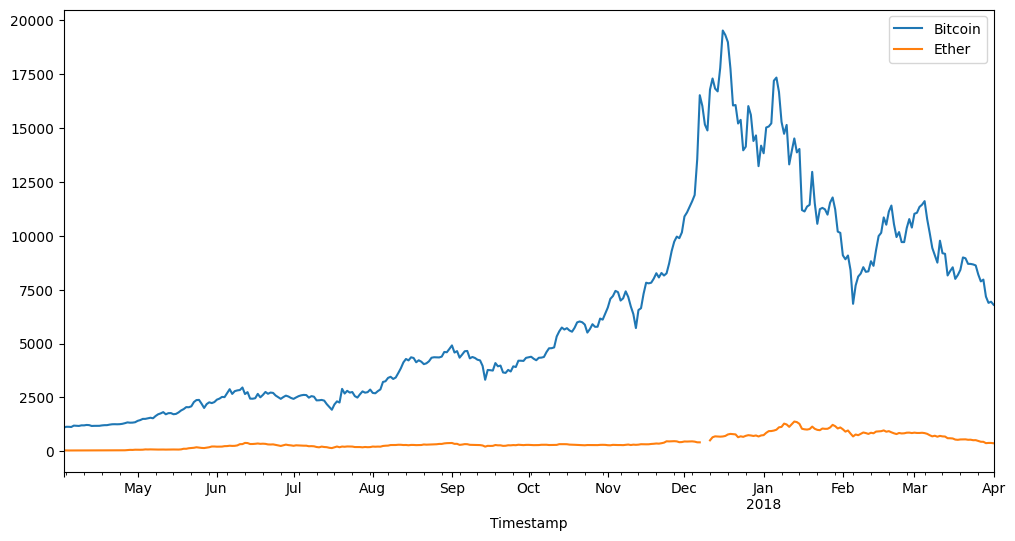

In [32]:
prices.plot(figsize=(12,6))

<Axes: xlabel='Timestamp'>

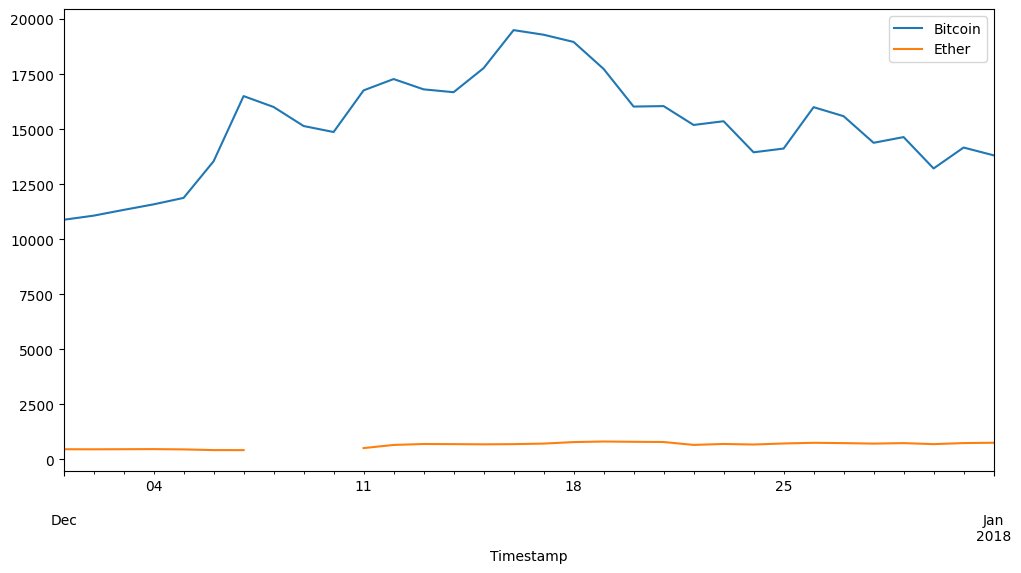

In [33]:
prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(12,6))